<a href="https://colab.research.google.com/github/natalia0911/Tarea_Practica_3_IA/blob/main/2022_1_Trabajo_Practico_03_NataliaVargas_FabricioElizondo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Primer Semestre 2022**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 03

**Datos de la entrega:** Lunes 30 de mayo 2022, a más tardar a las 11:59 pm

**Estudiantes:**
- Natalia Vanessa Vargas Reyes
- Fabricio Antonio Elizondo Fernández





___

# Nota Introductoria
___

Ustedes han sido contratados por la empresa *SoloIA* para trabajar con dos conjuntos de datos y lograr la mejor predicción posible, dadas ciertas métricas.

Para efectos de dudas o ampliaciones sobre el proyecto, además de lo que se indique en este cuaderno, considere a Luis-Alexánder Calvo-Valverde como su cliente para atender sus consultas.

**IMPORTANTE:** Entre los algoritmos elegidos para las partes 1 y 2, no debe usar ninguno visto en clase.  En caso de duda puede preguntar primero al profesor.

___

# Parte 1  -  Clasificación (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **cardio.csv**
1. Algunos detalles del conjunto de datos los puede ver en: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.  **Pero debe usar el conjunto de datos que se le dan adjuntos a este Trabajo Práctico, no descargar otro**.
1. El atributo a predecir es: **cardio**.
1. Proponga al menos dos algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. Ustedes propongan una más.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso.
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros.
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.
    1. Programación del diseño experimental. 
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda. 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####Análisis del conjunto de datos


In [ ]:
# Se realiza la carga de los datos por utilizar 
dataset = pd.read_csv('cardio.csv', delimiter = ";")

# Se imprimen las dimensiones del arreglo
print(f"Las dimensiones del arreglo cargado son: {dataset.shape}")

#Se muestran los primeros 10 valores del conjunto de datos
dataset.head(10)

Las dimensiones del arreglo cargado son: (69301, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,2,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,3,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,4,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,5,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,6,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,7,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,8,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,9,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,10,22446,1,158,65.0,140,90,3,1,0,0,1,1


####Modelo Train-Validation-Test

####Preprocesamiento de los datos

####Diseño experimental

####Resultados y Conclusiones

___

# Parte 2  -  Clustering  (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **descubrir_emociones.csv**
1. Este dataset corresponde a pixeles en imágenes, a partir de las cuales se desea descubrir cuántos grupos (clusters) se podrían encontrar. Se cree que son diferentes emociones de las personas en las imágenes (alegría, enojo, tristeza, etc).
1. Proponga al menos dos algoritmos a utilizar
1. Proponga una métrica, la cual debe ser **interna**.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso. Observará que en este caso viene bastante preparado
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros.
    1. Explicación del diseño experimental por ejecutar. En este caso recuerde que es aprendizaje NO Supervisado. Además en cuanto al número de clusters, se cree que es mayor que uno y menor que veinte. 
    1. Programación del diseño experimental. 
    1. Muestre en una tabla los resultados de la métrica.
    1. Grafique las métrica para ver el criterio del codo.
    1. ¿Cuál es el númermo de cluster que considera mejor describe el conjunto de datos? ¿Cómo defendería su recomendación ante su contratante? (Considere en su respuesta los algoritmos que utilizó)

##2.1. Preprocesamiento de los datos
En esta sección como un paso inicial, se carga se el dataset y se muestra algunas de las imagenes contenidas en este. 
Como parte del procesamiento, normalmente buscaríamos valores faltantes, outliers, y variables que haya que codificar. Pero para este dataset no es mecesario, pues se trata de pixeles, y todos están completos ya que todas las imágenes tienen la misma dimensión, además todas las variables, sabemos de ante mano que están en un valor de 0 a 255, por lo que no habrán outliers a menos que se haya hecho mal el dataset. 

Tampoco tenemos que codificar variables pues todas hacen referencia a pixeles. Esto también nos lleva a que no se pueden reducir atributos, al menos no para el problema que queremos resolver con este conjunto, porque nos interesa tener las imagenes completas. 

De igual forma, no consideramos necesario hacer un escalamiento de los datos, porque todos se encuentran entre 0 y 255, son valores que tenemos por seguro que serán así. Si se desea se puede escalar, pero consideramos que no es indispensable en este caso.

In [1]:
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
emotions_df = pd.read_csv('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/descubrir_emociones.csv', header = 0, delimiter=';')  
#print(dataset.describe())
print(emotions_df.head(2))
#Ver las filas
#A veces no me cargan todas
print(emotions_df.shape[0])

    p1   p2   p3   p4   p5   p6   p7   p8   p9  p10  ...  p2295  p2296  p2297  \
0   70   80   82   72   58   58   60   63   54   58  ...    159    182    183   
1  151  150  147  155  148  133  111  140  170  174  ...    105    108     95   

   p2298  p2299  p2300  p2301  p2302  p2303  p2304  
0    136    106    116     95    106    109     82  
1    108    102     67    171    193    183    184  

[2 rows x 2304 columns]
24568


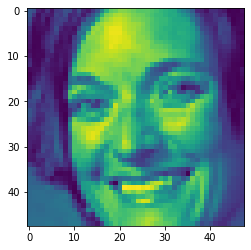

In [4]:
def displayImg(i):
  plt.imshow(emotions_df.loc[i].values.reshape(48,48))

displayImg(2457)

##2.2 Algoritmos de clustering

###2.2.2 Mini-batch K-means Clustering

Este algoritmo es una variante del K means visto en clases, solo que utiliza lotes, para reducir el tiempo de cálculo e intenta optimizar la función de objetivo al mismo tiempo.
Los mini lotes son muestreados en cada iteración, la desventaja es que muestra peores resultados que el K means, pero con la ventaja de ser más rápido. 
Otro aspecto de este algortimo es que por cada lote, el centroide asignado, se actualiza, con el promedio de todas las muestras anteriores a ese centroide y a la larga, esto disminuye la tasa de cambio del mismo.

Para este ejemplo usamos este algoritmo por su rápidez, ya que otros aunque quizá más exactos, tardan incluso horas, y muchos otros no tenían el hiperparámetro de número de clúster que es requerido en esta tarea. 



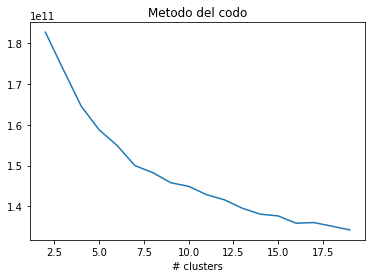

In [4]:
from sklearn.cluster import MiniBatchKMeans


wcss= []
#De 2 a 19
for i in range(2,20): 
    kmeans = MiniBatchKMeans(n_clusters=i, init="k-means++",max_iter=300, n_init=20, random_state=0, batch_size=1024) #max_iter por default es 300
    kmeans.fit(emotions_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,20),wcss ) 
plt.title("Metodo del codo")
plt.xlabel("# clusters")
plt.show() 

In [14]:
wcss

[182738773040.73022,
 173567794251.3118,
 164590982228.35986,
 158794861720.86523,
 154964805118.6219,
 150005506221.35626,
 148285725287.56284,
 145813504636.55832,
 144926054370.20642,
 142882775911.96304,
 141625326353.82452,
 139550428719.00446,
 138089589457.58792,
 137664198062.05756,
 135879304619.80043,
 136031115471.32611,
 135155151483.73389,
 134232143299.16116]

In [ ]:
miniB_KMeans = MiniBatchKMeans(n_clusters=7, init="k-means++",max_iter=300, n_init=7, random_state=0, batch_size=1024)
miniB_KMeans.fit(emotions_df)

result = miniB_KMeans.predict(emotions_df)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_emotions = pca.fit_transform(emotions_df)
pca_emotions_df =  pd.DataFrame(data= pca_emotions, columns=['C1','C2'])
pca_emotions_clusters = pd.concat([pca_emotions_df,  pd.DataFrame(result)],axis = 1)
pca_emotions_clusters = pca_emotions_clusters.rename({0: 'Label'}, axis=1)
pca_emotions_clusters.head()

,C1,C2,Label
0,701.059432,332.086127,2
1,-60.482652,-503.266145,6
2,-231.780172,-489.782329,6
3,-401.480258,1276.986918,1
4,1027.018325,1099.774360,2


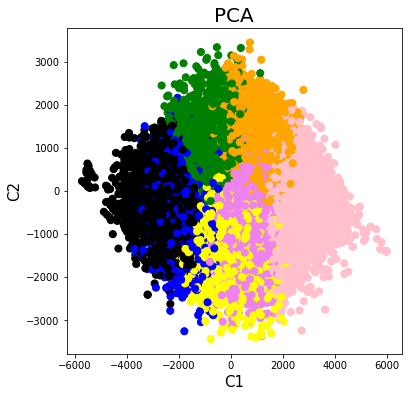

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

colors =  np.array(['blue', 'green', 'orange','pink','black','yellow','violet'])
ax.scatter(x=pca_emotions_clusters.C1, y=pca_emotions_clusters.C2, c=colors[pca_emotions_clusters.Label], s=50)
plt.show()

###2.2.1 Birch clustering

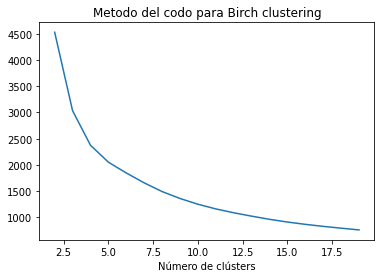

In [14]:
from sklearn.cluster import Birch
from sklearn.metrics import calinski_harabasz_score
#Sum of squares based indexes
SSBI = []

#De 2 a 19
for i in range(2,20): 
  birch = Birch(n_clusters=i, compute_labels = True, branching_factor = 60, threshold = 0.5) 
  birch.fit(emotions_df)
  c_score = calinski_harabasz_score(emotions_df, birch.labels_)
  SSBI.append(c_score)

plt.plot(range(2,20),SSBI) 
plt.title("Metodo del codo para Birch clustering")
plt.xlabel("Número de clústers")
plt.show() 


In [15]:
birch = Birch(n_clusters=7, compute_labels = True, branching_factor = 60, threshold = 0.5)
birch.fit(emotions_df)

result = birch.predict(emotions_df)

In [19]:
from sklearn.decomposition import PCA
pca_b = PCA(n_components=2)
pca_emotions_b = pca_b.fit_transform(emotions_df)
pca_emotions_df_b =  pd.DataFrame(data= pca_emotions_b, columns=['C1','C2'])
pca_emotions_clusters_b = pd.concat([pca_emotions_df_b,  pd.DataFrame(birch.labels_)],axis = 1)
pca_emotions_clusters_b = pca_emotions_clusters_b.rename({0: 'Label'}, axis=1)
pca_emotions_clusters_b.head()

,C1,C2,Label
0,701.059432,332.086113,4
1,-60.482652,-503.266167,3
2,-231.780172,-489.782292,3
3,-401.480258,1276.986924,1
4,1027.018325,1099.774285,2


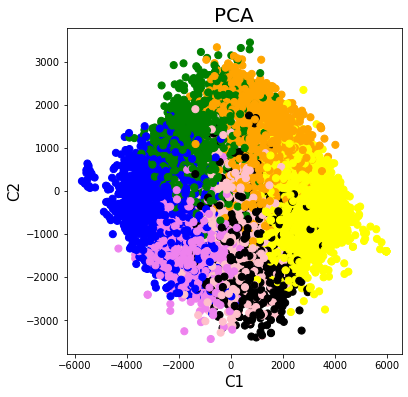

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

colors =  np.array(['blue', 'green', 'orange','pink','black','yellow','violet'])
ax.scatter(x=pca_emotions_clusters_b.C1, y=pca_emotions_clusters_b.C2, c=colors[pca_emotions_clusters_b.Label], s=50)
plt.show()

In [24]:

def sumar(contador):
  return contador + 1

def restar(contador):
  return contador - 2

def w():
  contador = 0
  while(True):
    contador = restar(contador)
    contador = sumar(contador)
  
